<a href="https://colab.research.google.com/github/victoriaPaez/MujeresDigitales2021/blob/main/DTaller_semana_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo taller 7 - G1 Data Science
# Andrea Victoria Pàez Vargas

## Introducción

**Contexto comercial.** Usted es un analista en una entidad bancaria, y se le proporciona un conjunto de datos de los clientes. Su jefe le pide que analice la información para determinar si existen similaridades entre grupos de clientes para lanzar una campaña de mercadeo.

**Problema comercial.** Su tarea es **crear un modelo de clusterización para determinar si existen grupos de clientes similares**.

**Contexto analítico.** Como científico de datos, se le pide realizar una clusterización de los clientes para identificar 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv("Lending_club_cleaned_2.csv")

In [3]:
df.head()

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


## Ejercicio 1:

Realice una normalización de los datos numéricos es decir que los valores oscilen entre 0 y 1 en las columnas  annual_inc y loan_amnt.
Consejo: antes de realizar la normalización asegúrese de que el tipo de dichas columnas si sea numérico.

In [4]:
df.dtypes

loan_status             object
annual_inc             float64
verification_status     object
emp_length              object
home_ownership          object
int_rate                object
loan_amnt                int64
purpose                 object
term                    object
grade                   object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_status          38705 non-null  object 
 1   annual_inc           38705 non-null  float64
 2   verification_status  38705 non-null  object 
 3   emp_length           38705 non-null  object 
 4   home_ownership       38705 non-null  object 
 5   int_rate             38705 non-null  object 
 6   loan_amnt            38705 non-null  int64  
 7   purpose              38705 non-null  object 
 8   term                 38705 non-null  object 
 9   grade                38705 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.0+ MB


In [6]:
# copiamos el dataframe para no alterar el dataframe original
dfN=df.copy()
dfN.head()


,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B


In [7]:
#seleccionamos las columas que estamos interesados annual_inc y 	loan_amnt
dfN=dfN[['annual_inc','loan_amnt']]
dfN.head()

,annual_inc,loan_amnt
0,24000.0,5000
1,30000.0,2500
2,12252.0,2400
3,49200.0,10000
4,80000.0,3000


In [8]:
# Funcion Normalize
# dfN_input = dfN, DataFrame sobre el que queremos aplicar el metodo
def minmax_norm(dfN_input):
  for i in dfN.columns:
    return (dfN - dfN.min()) / ( dfN.max() - dfN.min())

In [9]:
#dataframe ya normalizado
dfN_minmax_norm = minmax_norm(dfN[['annual_inc', 'loan_amnt']])
dfN_minmax_norm


,annual_inc,loan_amnt
0,0.003336,0.130435
1,0.004336,0.057971
2,0.001376,0.055072
3,0.007538,0.275362
4,0.012675,0.072464
...,...,...
38700,0.017678,0.057971
38701,0.002335,0.231884
38702,0.016011,0.130435
38703,0.032688,0.130435


In [10]:
#Comprobamos que el DataFrame este normalizado
dfN_minmax_norm.describe()

,annual_inc,loan_amnt
count,38705.000000,38705.000000
mean,0.010944,0.313157
std,0.010711,0.216531
min,0.000000,0.000000
25%,0.006254,0.144928
50%,0.009340,0.275362
75%,0.013209,0.420290
max,1.000000,1.000000


In [11]:
dfN_minmax_norm.dtypes

annual_inc    float64
loan_amnt     float64
dtype: object

Text(0.5, 1.0, 'loan_amnt vs. annual_inc - Normalized')

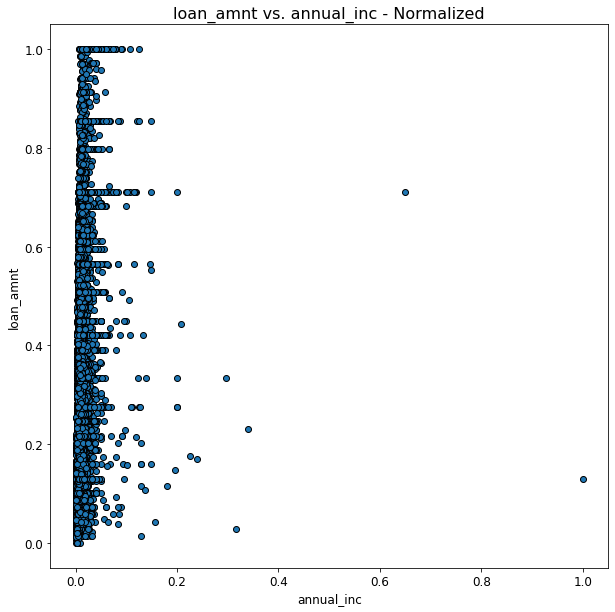

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(dfN_minmax_norm['annual_inc'], dfN_minmax_norm['loan_amnt'], edgecolor='k')
plt.xlabel('annual_inc', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('loan_amnt', fontsize=12)
plt.yticks(fontsize=12)
plt.title('loan_amnt vs. annual_inc - Normalized', fontsize=16)

## Ejercicio 2:

Emplee el algoritmo de k-means para agrupar a los clientes usando un número de clusters de 4.

In [13]:
# Escriba aquí su codigo
dfN_minmax_norm.head()


,annual_inc,loan_amnt
0,0.003336,0.130435
1,0.004336,0.057971
2,0.001376,0.055072
3,0.007538,0.275362
4,0.012675,0.072464


In [14]:
k = 4
kmeansC = KMeans(n_clusters=k, init='k-means++')
kmeansC.fit(dfN_minmax_norm[['annual_inc', 'loan_amnt']])

labels = kmeansC.predict(dfN_minmax_norm[['annual_inc', 'loan_amnt']])
centroids = kmeansC.cluster_centers_
centroids

array([[0.01265608, 0.48122444],
       [0.00849035, 0.11657391],
       [0.01788992, 0.78197901],
       [0.0104421 , 0.27980335]])

In [15]:
dfN_minmax_norm['Kmeasn_Clusters']=kmeansC.labels_
dfN_minmax_norm.head()

,annual_inc,loan_amnt,Kmeasn_Clusters
0,0.003336,0.130435,1
1,0.004336,0.057971,1
2,0.001376,0.055072,1
3,0.007538,0.275362,3
4,0.012675,0.072464,1


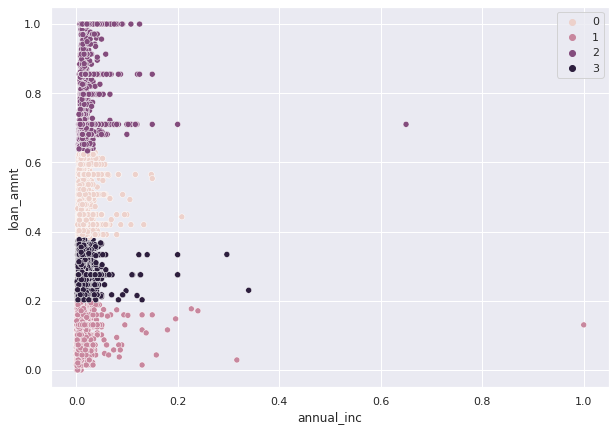

In [16]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data=dfN_minmax_norm, x='annual_inc', y= 'loan_amnt',hue=labels)

## Ejercicio 3 (Opcional):

Realice un gráfico de dispersión (scatter) para vizualizar los cluster que descubrió en el punto anterior (ejercicio 2). Usando colores diferentes para identificar los 4 cluster.

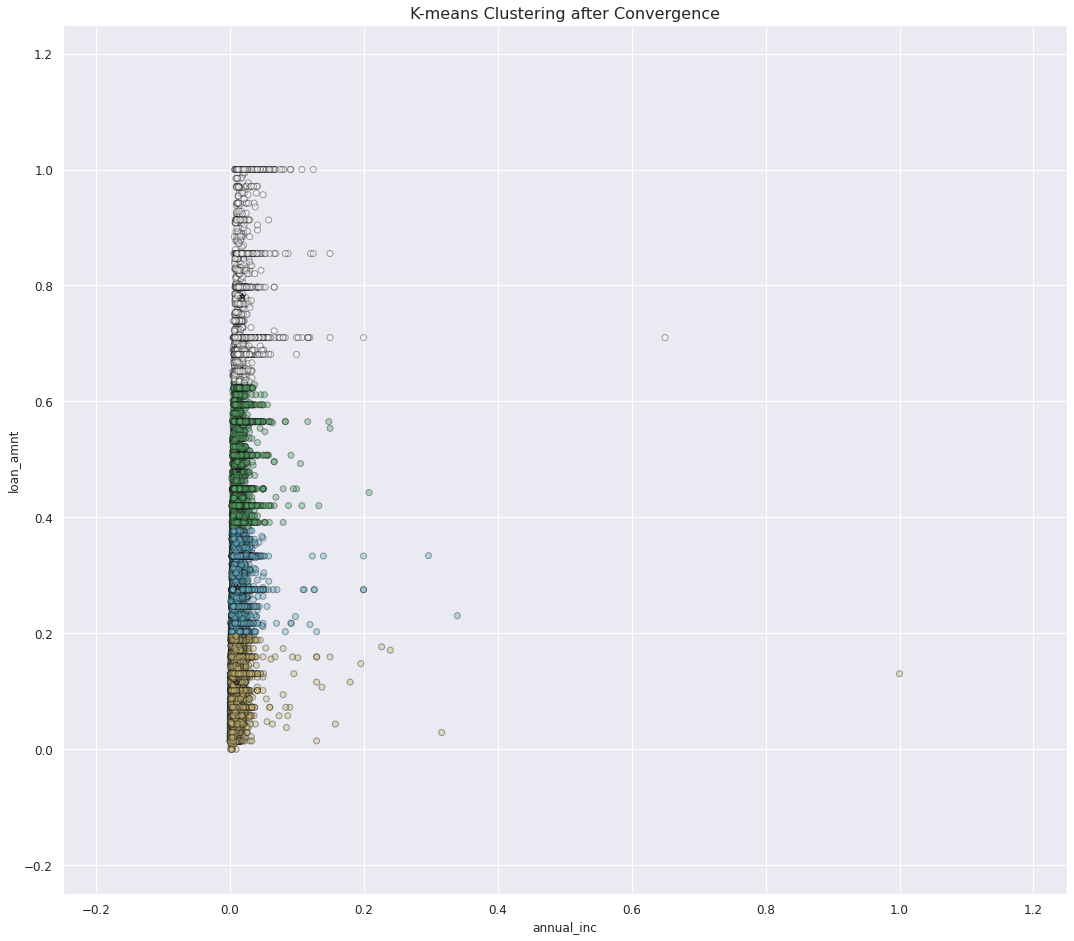

In [17]:
# Escriba aquí su codigo
# Graficar la data 
plt.figure(figsize=(18, 16))
color_map = {1:'g', 2:'y', 3:'w' , 4:'c', 5:'r', 6:'b'}
colors = [color_map[x+1] for x in labels]

plt.scatter(dfN_minmax_norm['annual_inc'], dfN_minmax_norm['loan_amnt'], color=colors, alpha=0.4, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-0.25, 1.25)
plt.xlabel('annual_inc', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-0.25, 1.25)
plt.ylabel('loan_amnt', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()


## Ejercicio 4 (Opcional):

Use el método del codo para verificar cual es el número de clusters óptimo. Revise desde 1 clúster hasta 11 para realizar esta validación.

In [18]:
# Escriba aquí su codigo
dfLC=[]
for i in range (1,11):
  kmeans =KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(dfN_minmax_norm)
  dfLC.append(kmeans.inertia_)


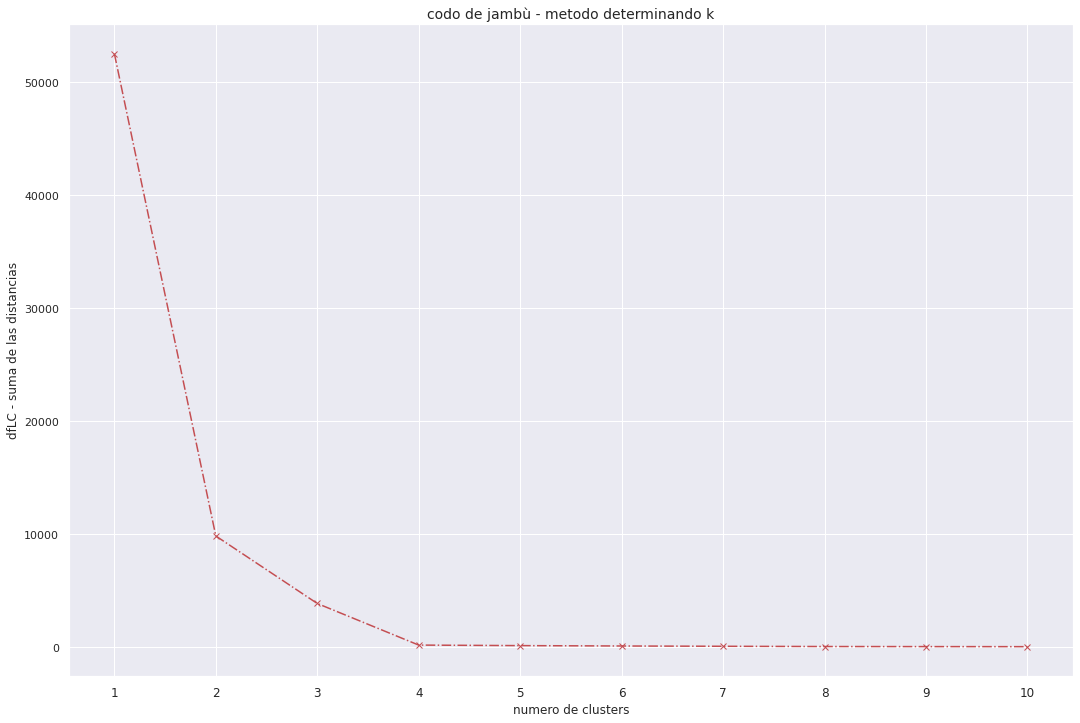

In [19]:
plt.figure(figsize=(18,12))
plt.plot(range(1,11),dfLC,'rx-.')
plt.title('codo de jambù - metodo determinando k',fontsize=14)
plt.xlabel('numero de clusters',fontsize=12)
plt.xticks(range(1,11),fontsize=12)
plt.ylabel('dfLC - suma de las distancias',fontsize=12)
plt.xticks(fontsize=12)
plt.show()